<a href="https://colab.research.google.com/github/ManavMoitra/neural-networks-from-scratch/blob/main/Sigmoid_Neuron_Implementation_on_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

In [19]:
data=pd.read_csv("/content/drive/MyDrive/BigData_Project/Mobile_data/mobile_cleaned.csv")

In [20]:
data.shape

(341, 88)

In [21]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [22]:
X=data.drop('Rating',axis=1)
Y=data['Rating'].values

In [23]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [24]:
threshold=4.2
data['Class']=(data['Rating']>=threshold).astype(int)

In [25]:
data['Class']

,Class
0,1
1,1
2,1
3,1
4,1
...,...
336,0
337,0
338,0
339,0


In [26]:
data['Class'].value_counts()

,count
Class,
0,182
1,159


In [27]:
data['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.533724
1,0.466276


In [28]:
Y_binarised=data["Class"].values
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [29]:
#Performing train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarised)


In [30]:
X_train.shape,X_test.shape

((255, 87), (86, 87))

##STANDARDISATION##

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
Scaler=StandardScaler()
X_Scaled_Train=Scaler.fit_transform(X_train)
X_Scaled_Test=Scaler.transform(X_test)


In [33]:
Min_Max_Scaler=MinMaxScaler()


In [34]:
Y_Scaled_Train=Min_Max_Scaler.fit_transform(y_train.reshape(-1,1))


In [35]:
Y_Scaled_Test=Min_Max_Scaler.transform(y_test.reshape(-1,1))

In [36]:
scaled_threshold=list(Min_Max_Scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [37]:
scaled_threshold

np.float64(0.6800000000000002)

In [38]:
Y_binarised_train=(Y_Scaled_Train>scaled_threshold).astype(int).ravel()

In [39]:
Y_binarised_test=(Y_Scaled_Test>scaled_threshold).astype(int).ravel()

**CLASS SIGMOID NEURON**

In [74]:
class SigmoidNeuron:
  def __init__(self):
    self.W=0
    self.b=0

  def perceptron(self,x):
    return np.dot(x,self.W.T)+self.b

  def Sigmoid(self,x):
    return 1.0/(1.0+np.exp(-(x)))

  def grad_W(self,x,y):
    y_pred=self.Sigmoid(self.perceptron(x))
    return (y_pred-y)*(y_pred)*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred=self.Sigmoid(self.perceptron(x))
    return (y_pred-y)*(y_pred)*(1-y_pred)

  def fit(self,X,Y,epochs,initialise=True,learning_rate=0.01,display_loss=False):
    if initialise:
      self.W=np.random.randn(1,X.shape[1])
      self.b=0
    if display_loss:
      loss={}
    for i in range(epochs):
      self.dw=0
      self.db=0
      for x,y in zip(X,Y):
        self.dw+=self.grad_W(x,y)
        self.db+=self.grad_b(x,y)
      self.W=self.W-learning_rate*self.dw
      self.b=self.b-learning_rate*self.db

      if display_loss:
        Y_pred=self.Sigmoid(self.perceptron(X))
        loss[i]=mean_squared_error(Y_pred,Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.Sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)





##TRAIN ON REAL TEST DATA##

In [75]:
sn=SigmoidNeuron()


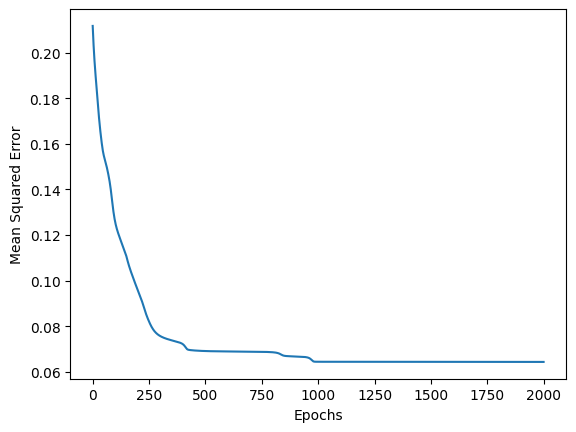

In [82]:
sn.fit(X_Scaled_Train,Y_Scaled_Train,epochs=2000,learning_rate=0.01,display_loss=True)


In [77]:
y_pred_train=sn.predict(X_Scaled_Train)
y_pred_test=sn.predict(X_Scaled_Test)

In [78]:
y_pred_binarised_train=(y_pred_train>scaled_threshold).astype(int).ravel()
y_pred_binarised_test=(y_pred_test>scaled_threshold).astype(int).ravel()

In [79]:
train_accuracy=accuracy_score(y_pred_binarised_train,Y_binarised_train)
test_accuracy=accuracy_score(y_pred_binarised_train,Y_binarised_train)

In [80]:
print(train_accuracy,test_accuracy)

0.6784313725490196 0.6784313725490196
